> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [TMDb_movie_data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This analysis looks into the relations that genre, release year, and revenue (adjusted for inflation) have with a movies' overall rating and profit based on the data from The Movie Database (TMDb), which includes information, classifications, and statistics about nearly 11,000 movies.


### Question(s) for Analysis
1. Which genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?


In [1]:
# Begin by importing the libraries for needed for analysis and set inline plotting.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import ast


In [40]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.5MB/s eta 0:00:01   31% |██████████                      | 3.3MB 27.7MB/s eta 0:00:01    70% |██████████████████████▌         | 7.4MB 28.8MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.8MB/s eta 0:00:01   14% |████▋                           | 1.9MB 28.4MB/s eta 0:00:01    24% |███████▊                        | 3.2MB 27.6MB/s eta 0:00:01    33% |██████████▉                     | 4.5MB 26.6MB/s eta 0:00:01    62% |████████████████████            | 8.4MB 26.6MB/s eta 0:00:01    81% |██████████████████████████      | 10.9MB 26.4MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling



### General Properties
Read the .csv file into a pandas dataframe.


In [2]:
df_imdb = pd.read_csv('tmdb-movies.csv')

In [3]:
df_imdb.shape

(10866, 21)

In [4]:
df_imdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# Check for and drop any duplicated rows.
df_imdb.duplicated().sum()

1

In [6]:
df_imdb.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
# # Check for and drop any null cells.
df_imdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning

Drop the columns that are not useful for this analysis. Budget may help account for higher ratings, and revenue allows us to calculate profit. The release_year, genres, budget_adj, and vote_average columns are the main columns of information we need to answer the questions posed.


 

In [8]:
df_imdb.drop_duplicates(inplace=True)

In [9]:
df_imdb.drop(['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'release_date', 'vote_count'], axis = 1, inplace = True)

In [10]:
df_imdb.head()

,popularity,budget,revenue,original_title,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
df_imdb.shape

(10865, 9)

In [12]:
df_imdb.dropna(inplace=True)

In [13]:
df_imdb.shape

(10842, 9)

In [14]:
df_imdb.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
genres             object
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

# Visualize the data by column to examine the data.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd66aeee908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd66ad52518>]], dtype=object)

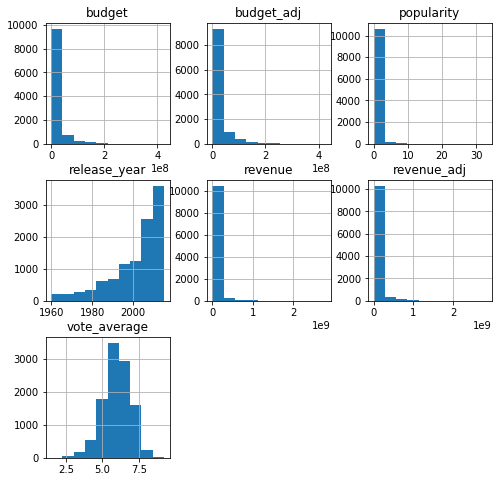

In [15]:
df_imdb.hist(figsize=(8, 8))

<a id='eda'></a>
## Exploratory Data Analysis

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

To explore the genres, we need to divide the movies into groups based on genres. Since each movie can have multiple genres, the simplest way to analyze genre information is to include a movie in the group for each genre it has, even if that means that a movie is included in multiple dataframes.

This does limit the report because it will not look at every combination of genre as separate groups. 
.nunique() shows us that there are 2,039 different combinations of genres in this dataset;

### Research Question 1 (Which genres are most popular from year to year? )

In [16]:
df_imdb.genres.nunique()

2039

In [17]:
df_imdb.release_year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966])

Instead, we will create separate dataframes for each individual genre, including a movie if the genre is included in its list of genres. To begin this, we need find each individual genre that exists in this dataset.

We start by creating a NumPy array out of the genre column of the movie dataframe.

In [18]:
genre_array = df_imdb.genres.values
genre_array = genre_array.astype('U')
split_genre = np.core.defchararray.split(a = genre_array, sep = '|')

We then split the elements of the genre array by the | delimiter and store the individual genres in a new array.

In [19]:
split_genre

array([['Action', 'Adventure', 'Science Fiction', 'Thriller'],
       ['Action', 'Adventure', 'Science Fiction', 'Thriller'],
       ['Adventure', 'Science Fiction', 'Thriller'], ...,
       ['Mystery', 'Comedy'], ['Action', 'Comedy'], ['Horror']], dtype=object)

By getting a total number and the maximum length of words representing genre tags in all dataframe genre column values, we can initialize a properly sized array to utilize numpy's efficiency better.

In [20]:
total_words = 0
max_length = 0

for index, row in enumerate(split_genre):
    for word in split_genre[index]:
        total_words += 1
        if len(word) > max_length:
            max_length = len(word)

Initialize a numpy array with the shape of 1 x the total number of words representing genres.

In [21]:
combined_genre = np.empty((1, total_words), dtype = ('U' + str(max_length)))
combined_genre.shape

(1, 26955)

Set each element in the array

In [22]:
count = 0

for index, row in enumerate(split_genre):
    row_list = ast.literal_eval(str(row))
    
    for word in row_list:
        combined_genre[0, count] = word
        count += 1

In [23]:
combined_genre

array([['Action', 'Adventure', 'Science Fiction', ..., 'Action', 'Comedy',
        'Horror']], 
      dtype='<U15')

Finally, find each individual genre in the combined_genre_array.

In [24]:
genre_list = np.unique(combined_genre)

Now that we have a list of all of the genres in the dataset, we can create a new dataframe for each genre.

In [25]:
#_df = df.loc[df.genres.str.contains('')]
action_df = df_imdb.loc[df_imdb.genres.str.contains('Action')]
adventure_df = df_imdb.loc[df_imdb.genres.str.contains('Adventure')]
animation_df = df_imdb.loc[df_imdb.genres.str.contains('Animation')]
comedy_df = df_imdb.loc[df_imdb.genres.str.contains('Comedy')]
crime_df = df_imdb.loc[df_imdb.genres.str.contains('Crime')]
documentary_df = df_imdb.loc[df_imdb.genres.str.contains('Documentary')]
drama_df = df_imdb.loc[df_imdb.genres.str.contains('Drama')]
family_df = df_imdb.loc[df_imdb.genres.str.contains('Family')]
fantasy_df = df_imdb.loc[df_imdb.genres.str.contains('Fantasy')]
foreign_df = df_imdb.loc[df_imdb.genres.str.contains('Foreign')]
history_df = df_imdb.loc[df_imdb.genres.str.contains('History')]
horror_df = df_imdb.loc[df_imdb.genres.str.contains('Horror')]
music_df = df_imdb.loc[df_imdb.genres.str.contains('Music')]
mystery_df = df_imdb.loc[df_imdb.genres.str.contains('Mystery')]
romance_df = df_imdb.loc[df_imdb.genres.str.contains('Romance')]
science_fiction_df = df_imdb.loc[df_imdb.genres.str.contains('Science Fiction')]
tv_movie_df = df_imdb.loc[df_imdb.genres.str.contains('TV Movie')]
thriller_df = df_imdb.loc[df_imdb.genres.str.contains('Thriller')]
war_df = df_imdb.loc[df_imdb.genres.str.contains('War')]
western_df = df_imdb.loc[df_imdb.genres.str.contains('Western')]

Let's see how many of each genre is in this dataset by getting the length of the index in each genre dataframe. Then sort the values from highest to lowest.

In [26]:
genre_count = []
for genre in genre_list:
    temp = genre.lower() + "_df"
    temp = temp.replace(" ", "_")
    number = len(eval(temp + '.index'))
    
    genre_count.append([temp[:-3], number])
    
genre_count.sort(key = lambda x:x[1], reverse = True)

for index, genre in enumerate(genre_count):
    genre_count[index] = [genre[0].title().replace("_", " "), genre[1]]

print(genre_count)


[['Drama', 4760], ['Comedy', 3793], ['Thriller', 2907], ['Action', 2384], ['Romance', 1712], ['Horror', 1637], ['Adventure', 1471], ['Crime', 1354], ['Family', 1231], ['Science Fiction', 1229], ['Fantasy', 916], ['Mystery', 810], ['Animation', 699], ['Documentary', 520], ['Music', 408], ['History', 334], ['War', 270], ['Foreign', 188], ['Tv Movie', 167], ['Western', 165]]


def function to avoid repetitive code for all subplots.

In [27]:
def label (x, y, t):
    """"
    args:
    x (str): x-axis title
    y (str): y-axis title
    t (str): main title
    return:
    none
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

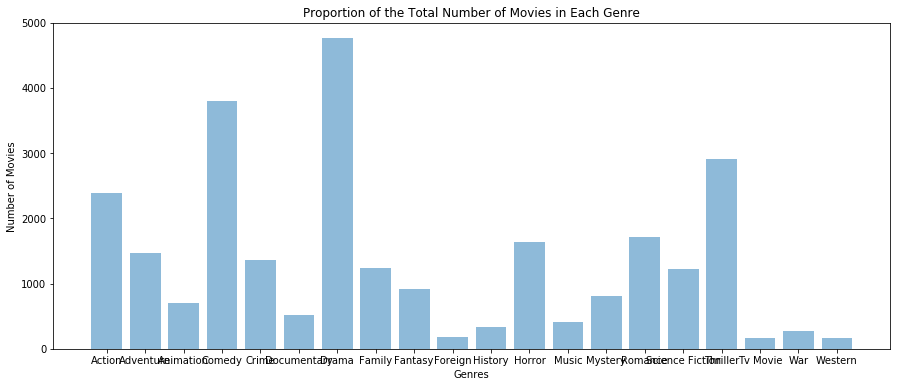

In [28]:
plt.subplots(figsize=(15, 6))
x, y = [*zip(*genre_count)]
plt.bar(x, y, alpha=0.5)
label('Genres', 'Number of Movies', 'Proportion of the Total Number of Movies in Each Genre')

In [29]:
years = df_imdb['release_year'].unique()
years.sort()
print(years)

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]


create a dataframe to store all of the results we need with rows for each calculation and columns for each genre.

In [30]:
result_rows = ['popularity_mean', 'budget_mean', 'revenue_mean']

for year in years:
    result_rows.append(str(year) + '_popularity')
    result_rows.append(str(year) + '_budget')
    result_rows.append(str(year) + '_revenue')
    
results_df = pd.DataFrame(index = result_rows, columns = genre_list)


In [31]:
for genre in genre_list:
    # Create the string to eval the dataframe of the current genre's movies.
    genre_df = genre.lower().replace(' ', '_') + '_df'
    
    # Set the overall means for the vote_average, budget_adj, and the revenure_adj columns, and calculate the overall profit mean.
    results_df.at['popularity_mean', str(genre)] = eval(genre_df)['popularity'].mean()
    results_df.at['budget_mean', str(genre)] = eval(genre_df)['budget'].mean()
    results_df.at['revenue_mean', str(genre)] = eval(genre_df)['revenue'].mean()
    
    # Set these four values for each year.
    for year in years:
        temp_year_df = eval(genre_df).loc[eval(genre_df)['release_year'] == year]
        results_df.at[str(year) + '_popularity', str(genre)] = temp_year_df['popularity'].mean()
        results_df.at[str(year) + '_budget', str(genre)] = temp_year_df['budget'].mean()
        results_df.at[str(year) + '_revenue', str(genre)] = temp_year_df['revenue'].mean()


Convert the results_df dtype from object to float. 

In [32]:
results_df = results_df.apply(pd.to_numeric, axis = 1, errors = 'coerce')

In [33]:
results_df.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
popularity_mean,9.262744e-01,1.154259e+00,8.521817e-01,5.926073e-01,7.449304e-01,1.814316e-01,5.914953e-01,7.866684e-01,9.928397e-01,1.914963e-01,5.759359e-01,4.653566e-01,4.873212e-01,6.900121e-01,5.920820e-01,1.001548e+00,0.270896,7.415630e-01,7.276831e-01,5.906155e-01
budget_mean,2.772782e+07,3.754369e+07,2.315978e+07,1.329792e+07,1.766380e+07,5.771491e+05,1.188072e+07,2.335934e+07,3.261259e+07,1.451435e+06,1.859492e+07,6.226529e+06,9.438628e+06,1.611927e+07,1.253127e+07,2.497268e+07,267664.670659,1.720769e+07,2.089189e+07,1.897411e+07
revenue_mean,7.279473e+07,1.131379e+08,7.525606e+07,3.752624e+07,4.236866e+07,2.041107e+06,2.923226e+07,7.243318e+07,9.631366e+07,1.520460e+06,3.201179e+07,1.682281e+07,2.857177e+07,4.021757e+07,3.569197e+07,7.014056e+07,251497.005988,4.172842e+07,4.760518e+07,2.856871e+07
1960_popularity,5.907245e-01,7.009808e-01,NaN,3.960004e-01,3.464795e-01,NaN,5.663052e-01,2.780637e-01,4.282475e-01,1.949480e-01,4.123642e-01,5.914496e-01,4.235310e-01,NaN,5.412275e-01,3.279047e-01,NaN,8.119100e-01,2.258635e-01,5.677590e-01
1960_budget,1.750000e+06,5.500000e+05,NaN,7.537500e+05,0.000000e+00,NaN,1.215919e+06,0.000000e+00,3.750000e+05,0.000000e+00,2.400000e+06,1.824211e+05,0.000000e+00,NaN,1.125000e+06,3.166667e+05,NaN,3.044913e+05,0.000000e+00,3.333333e+05


We can now use these results to find out which genre was the most popular in each year by the mean popularity average.

In [34]:
results_max = results_df.idxmax(axis = 1)

In [35]:
popularity_average_max = results_max[0::3]
budget_average_max = results_max[1::3]
revenue_average_max = results_max[2::3]
print(popularity_average_max)

popularity_mean          Adventure
1960_popularity           Thriller
1961_popularity          Animation
1962_popularity          Adventure
1963_popularity          Animation
1964_popularity                War
1965_popularity              Music
1966_popularity          Animation
1967_popularity          Animation
1968_popularity            Mystery
1969_popularity              Crime
1970_popularity          Animation
1971_popularity             Family
1972_popularity              Crime
1973_popularity          Animation
1974_popularity            Mystery
1975_popularity          Adventure
1976_popularity              Crime
1977_popularity             Action
1978_popularity              Music
1979_popularity             Action
1980_popularity    Science Fiction
1981_popularity          Adventure
1982_popularity                War
1983_popularity          Adventure
1984_popularity             Family
1985_popularity             Family
1986_popularity          Adventure
1987_popularity     

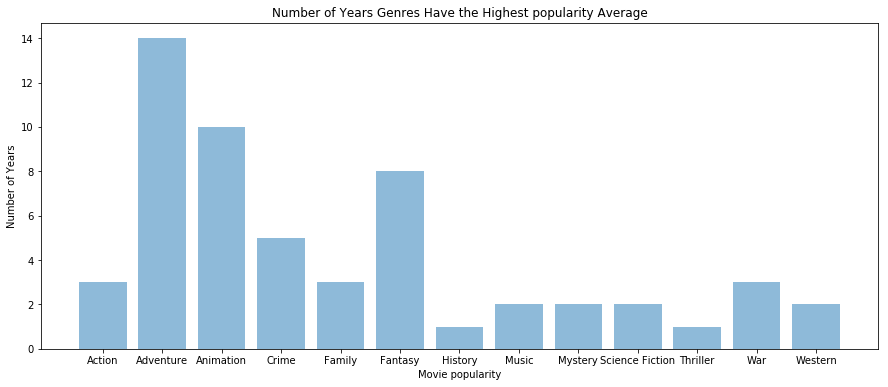

In [36]:
# Use [1:] to avoid counting the overall mean in the graphs.
plt.subplots(figsize=(15, 6))
vote_x = popularity_average_max[1:].value_counts().index.values.tolist()
vote_y = popularity_average_max[1:].value_counts().tolist()
plt.bar(vote_x, vote_y, alpha=0.5)
label('Movie popularity', 'Number of Years', 'Number of Years Genres Have the Highest popularity Average')

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [37]:
print(budget_average_max)

budget_mean    Adventure
1960_budget      History
1961_budget    Animation
1962_budget          War
1963_budget      History
1964_budget       Family
1965_budget      History
1966_budget          War
1967_budget          War
1968_budget    Adventure
1969_budget      History
1970_budget      Foreign
1971_budget    Animation
1972_budget      Fantasy
1973_budget    Animation
1974_budget       Action
1975_budget      Romance
1976_budget       Family
1977_budget          War
1978_budget      Fantasy
1979_budget       Action
1980_budget        Music
1981_budget          War
1982_budget      History
1983_budget      History
1984_budget    Adventure
1985_budget          War
1986_budget      Western
1987_budget      History
1988_budget      Foreign
1989_budget    Adventure
1990_budget    Adventure
1991_budget      History
1992_budget      History
1993_budget      Western
1994_budget          War
1995_budget       Action
1996_budget    Adventure
1997_budget          War
1998_budget      Western


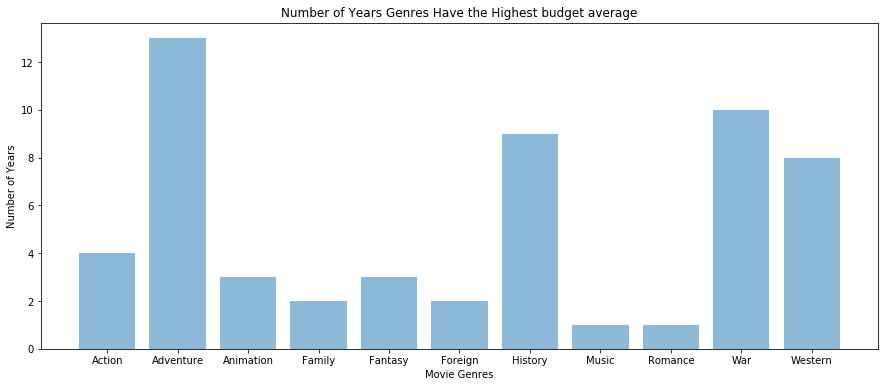

In [38]:
# Use [1:] to avoid counting the overall mean in the graphs.
plt.subplots(figsize=(15, 6))
profit_x = budget_average_max[1:].value_counts().index.values.tolist()
profit_y = budget_average_max[1:].value_counts().tolist()
plt.bar(profit_x, profit_y, alpha=0.5)
label('Movie Genres', 'Number of Years', 'Number of Years Genres Have the Highest budget average')

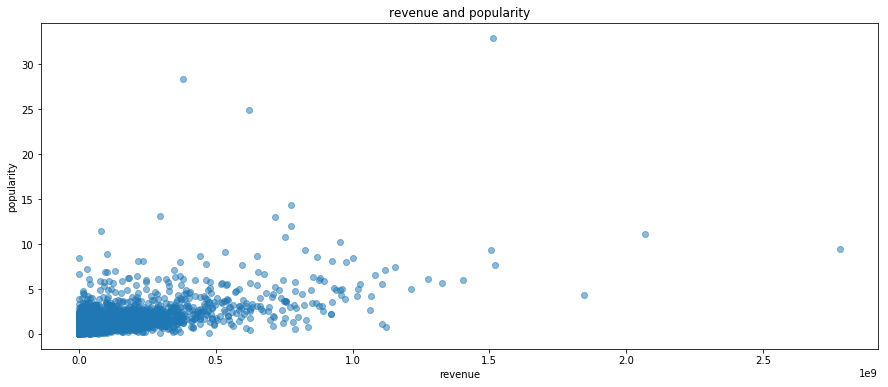

In [39]:
plt.subplots(figsize=(15, 6))
plt.scatter(df_imdb['revenue'], df_imdb['popularity'], alpha=0.5)
label('revenue', 'popularity', 'revenue and popularity')

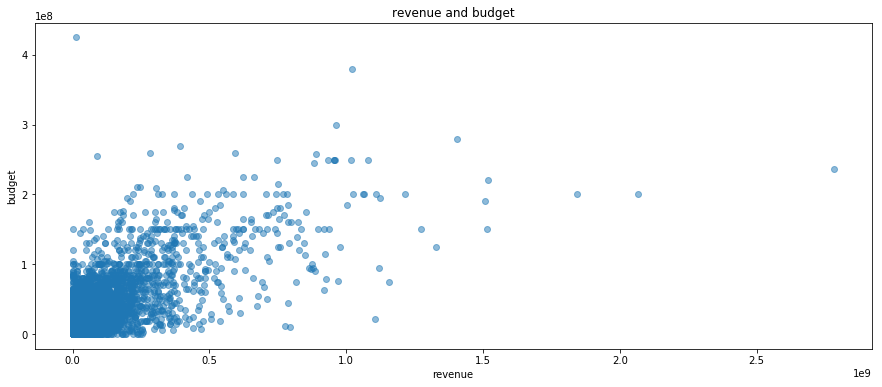

In [40]:
plt.subplots(figsize=(15, 6))
plt.scatter(df_imdb['revenue'], df_imdb['budget'], alpha=0.5)
label('revenue', 'budget', 'revenue and budget')

From this scatter plot and line of best fit, we can see that a higher revenue does have a slight correlation with a higher budget, but the absolute highest budget movies have lower revenue.

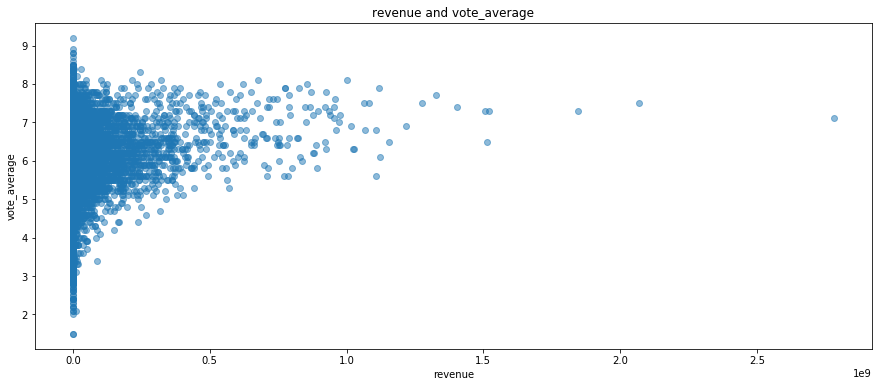

In [41]:
plt.subplots(figsize=(15, 6))
plt.scatter(df_imdb['revenue'], df_imdb['vote_average'], alpha=0.5)
label('revenue', 'vote_average', 'revenue and vote_average')

From this scatter plot and line of best fit, we can see that a higher revenue does have a slight correlation with a higher vote_average, but the absolute highest rated movies have lower revenue.

# Conclusions
This report has analyzed the The Movie Database (TMDb) to determine the answers to these two questions.

Which genres are most popular from year to year?
What kinds of properties are associated with movies that have high revenues?
The most highly rated movie genre by year varied, but the Fantasy genre was the genre that had the highest average popularity rating across the most years. This may be because Fantasy are more serious productions that tend to be polished and because less of them are produced.

Finally, a higher average budget does appear to have a very slight association with a higher average vote rating, but more statistical analysis will need to be performed to prove anything. Additionally, the highest and lowest vote ratings of all the dataset were with lower budget movies.

With this information it can be determined that in order to make a more successful movie measured by popularity ratings, one should make a Fantasy with the highest budget possible, and that to make a more successful movie by revenue, one should make adventure movies with higher budgets when able.

## limitathion
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. report is hard To explore the genres, we need to divide the movies into groups based on genres that there are 2,039 different combinations of genres in this dataset;

# Submitting your Project
Tip: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

Tip: Alternatively, you can download this report as .html via the File > Download as submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

Tip: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!



In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0